In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
pd.options.display.max_rows = 10

In [7]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,7,1,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,5,10,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,6,6,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,3,0,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,8,2,5,7,0,0,0,1,0,0,0,444


Dt_Customer: 고객이 회사에 등록한 날짜  
Recency: 고객의 마지막 구매 이후 일수

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

In [9]:
train.describe()

,id,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,553.500000,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841
std,319.996354,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,276.750000,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000
50%,553.500000,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000
75%,830.250000,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000
max,1107.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


In [10]:
def check_missing_value(df):
  missing_values = df.isnull().sum().sort_values(ascending=False)
  missing_percentage = (missing_values / len(df)) * 100
  result = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing values', '% Missing'])
  display(result)
check_missing_value(train)

,Missing values,% Missing
id,0,0.0
Year_Birth,0,0.0
Response,0,0.0
Complain,0,0.0
AcceptedCmp2,0,0.0
...,...,...
Kidhome,0,0.0
Income,0,0.0
Marital_Status,0,0.0
Education,0,0.0


In [11]:
for col in ['Education', 'Marital_Status']:
  print(train[col].unique())

['Master' 'Graduation' 'Basic' 'PhD' '2n Cycle']
['Together' 'Single' 'Married' 'Widow' 'Divorced' 'Alone' 'YOLO' 'Absurd']


In [12]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,7,1,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,5,10,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,6,6,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,3,0,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,8,2,5,7,0,0,0,1,0,0,0,444


In [13]:
# Dt_Customer를 연, 월, 일으로 분리
def seperate_datetime(dataframe):
  year = []
  month = []
  day = []

  for date in dataframe['Dt_Customer']:
    day_point, month_point, year_point = date.split('-')
    year.append(int(year_point))
    month.append(int(month_point))
    day.append(int(day_point))
  return year, month, day

year, month, day = seperate_datetime(train)
train['year'] = year
train['month'] = month
train['day'] = day

train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,7,1,8,7,0,0,0,0,0,0,0,541,2013,1,21
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,5,10,7,1,1,0,0,0,0,0,0,899,2014,5,24
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,6,6,9,3,0,0,0,0,0,0,0,901,2013,4,8
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,3,0,3,8,0,0,0,0,0,0,0,50,2014,3,29
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,8,2,5,7,0,0,0,1,0,0,0,444,2014,6,10


In [14]:
train.drop('Dt_Customer', axis=1, inplace=True)
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day
0,0,1974,Master,Together,46014.0,1,1,21,10,7,1,8,7,0,0,0,0,0,0,0,541,2013,1,21
1,1,1962,Graduation,Single,76624.0,0,1,68,1,5,10,7,1,1,0,0,0,0,0,0,899,2014,5,24
2,2,1951,Graduation,Married,75903.0,0,1,50,2,6,6,9,3,0,0,0,0,0,0,0,901,2013,4,8
3,3,1974,Basic,Married,18393.0,1,0,2,2,3,0,3,8,0,0,0,0,0,0,0,50,2014,3,29
4,4,1946,PhD,Together,64014.0,2,1,56,7,8,2,5,7,0,0,0,1,0,0,0,444,2014,6,10


In [15]:
categorical = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
               'Complain', 'Response']

quantitative = ['Year_Birth', 'Income', 'year',	'month', 'day', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

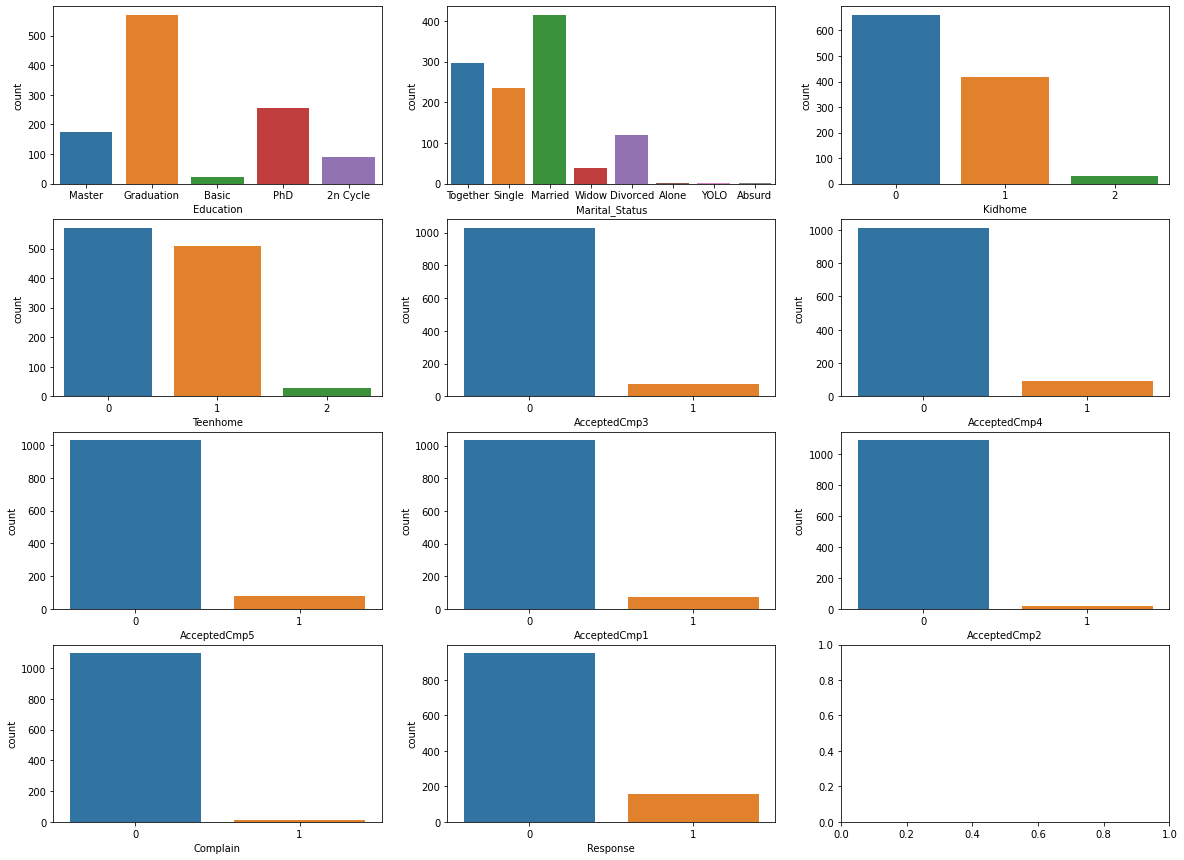

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))

for ax, feature in zip(axes.flatten(), categorical):
  sns.countplot(data=train, x=feature, ax=ax)
plt.show()

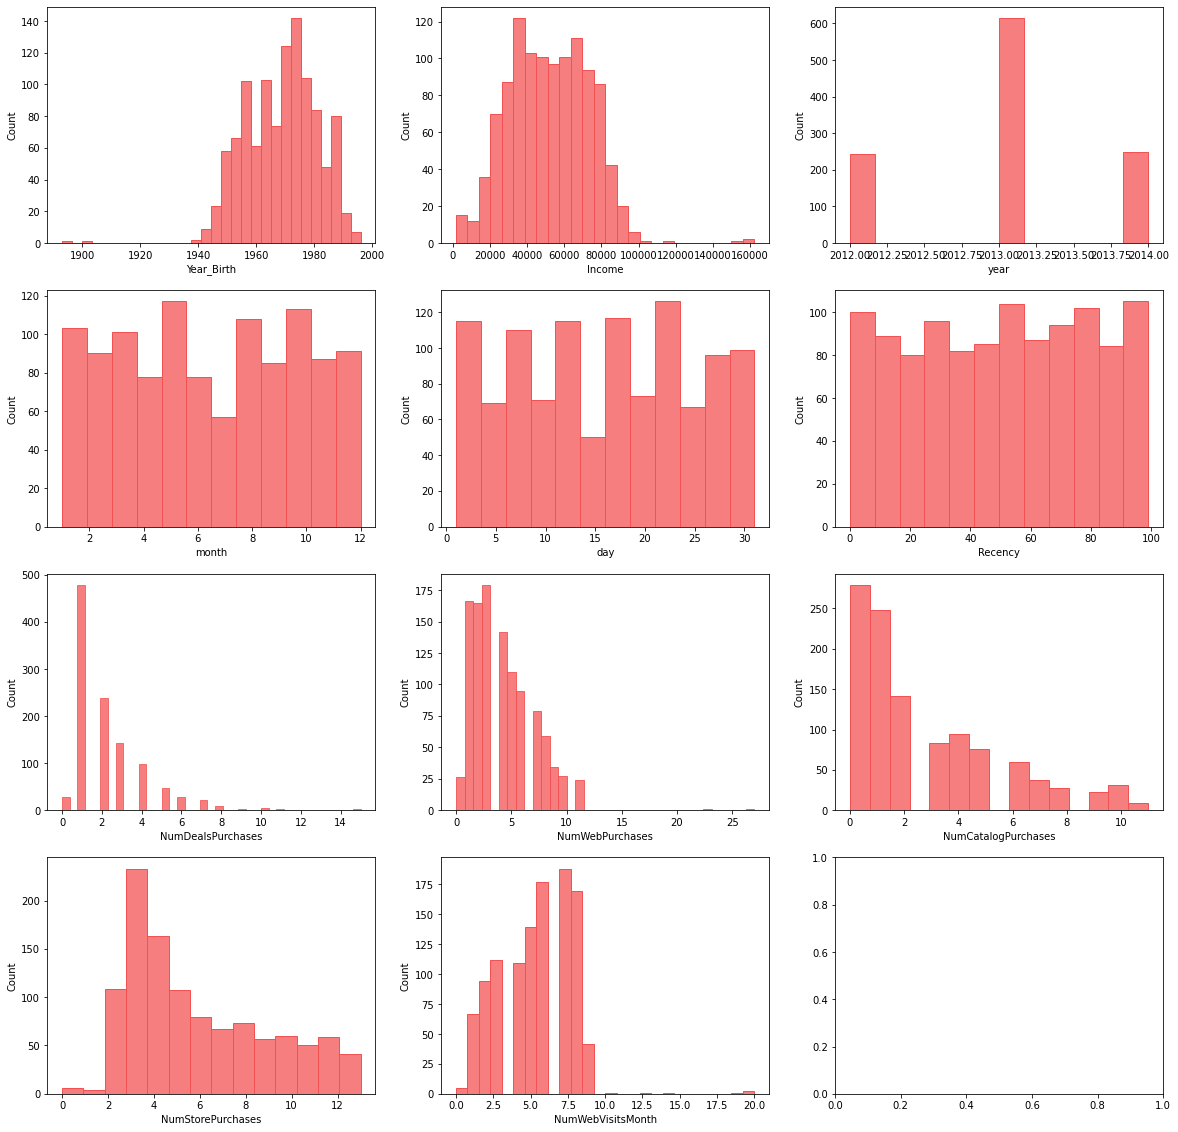

In [17]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

for ax, feature in zip(axes.flatten(), quantitative):
  sns.histplot(data=train, x=feature, ax=ax, color='#f55354', edgecolor='#f15354')
plt.show()

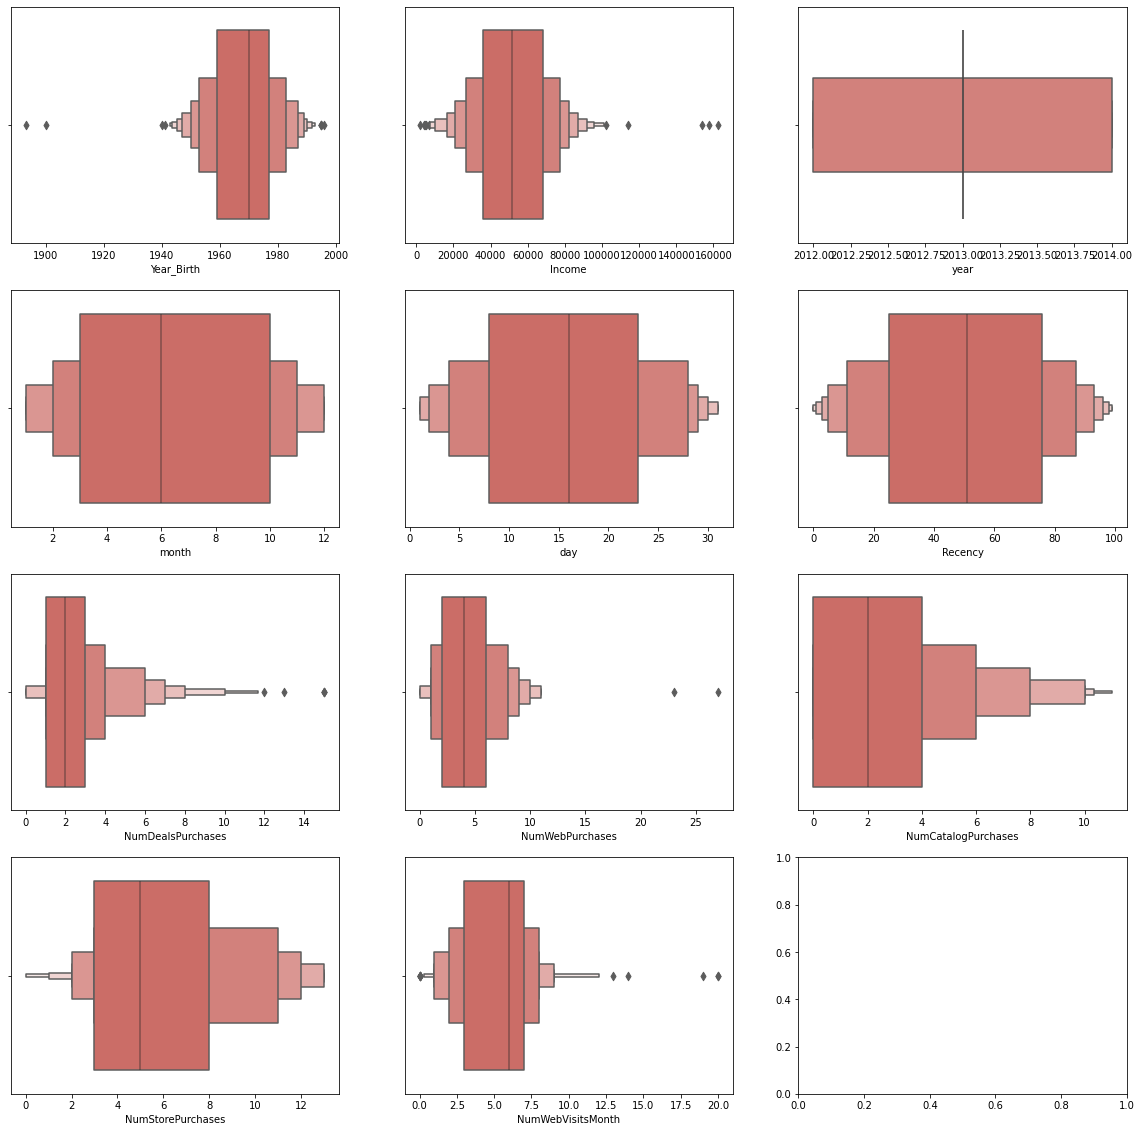

In [18]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

for ax, feature in zip(axes.flatten(), quantitative):
  sns.boxenplot(data=train, x=feature, ax=ax, palette='hls')
plt.show()

In [19]:
from scipy import stats
def IQR(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  return lower_bound, upper_bound

outliers = train[quantitative].apply(lambda column: IQR(column))
print("Range of outliers by method")
outliers

Range of outliers by method


,Year_Birth,Income,year,month,day,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1932.0,-13066.25,2013.0,-7.5,-14.5,-51.5,-2.0,-4.0,-6.0,-4.5,-3.0
1,2004.0,117159.75,2013.0,20.5,45.5,152.5,6.0,12.0,10.0,15.5,13.0


In [20]:
train[quantitative]

,Year_Birth,Income,year,month,day,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1974,46014.0,2013,1,21,21,10,7,1,8,7
1,1962,76624.0,2014,5,24,68,1,5,10,7,1
2,1951,75903.0,2013,4,8,50,2,6,6,9,3
3,1974,18393.0,2014,3,29,2,2,3,0,3,8
4,1946,64014.0,2014,6,10,56,7,8,2,5,7
...,...,...,...,...,...,...,...,...,...,...,...
1103,1956,46097.0,2013,3,31,11,5,3,1,6,4
1104,1986,23477.0,2013,10,21,39,3,3,0,4,8
1105,1975,37368.0,2013,12,16,4,1,1,0,2,6
1106,1974,53034.0,2013,5,30,30,8,6,1,7,8


In [22]:
def IQRsum(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR)
    upper_bound = Q3 +(1.5 * IQR)
    return ((column < lower_bound) | (column > upper_bound)).sum()

outliers = train[quantitative].drop(['year', 'month', 'day'], axis = 1).apply(lambda column: IQRsum(column))
print('Number of outliers by method')
outliers

Number of outliers by method


Year_Birth              2
Income                  3
Recency                 0
NumDealsPurchases      46
NumWebPurchases         2
NumCatalogPurchases     9
NumStorePurchases       0
NumWebVisitsMonth       4
dtype: int64

In [23]:
quantitative.append('target')

,Year_Birth,Income,year,month,day,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,target
Year_Birth,1.000000,-0.215129,-0.006035,-0.009237,0.001894,-0.000585,-0.086073,-0.165842,-0.166729,-0.131844,0.094419,-0.136035
Income,-0.215129,1.000000,0.015924,-0.022077,-0.018073,0.019414,-0.130339,0.492198,0.686210,0.624833,-0.649677,0.784084
year,-0.006035,0.015924,1.000000,-0.610776,0.018116,-0.068498,-0.162094,-0.155049,-0.112692,-0.124251,-0.222735,-0.159404
month,-0.009237,-0.022077,-0.610776,1.000000,0.011985,0.063269,-0.016171,0.011825,0.018612,0.024237,0.054944,0.037649
day,0.001894,-0.018073,0.018116,0.011985,1.000000,0.003919,0.002079,0.027120,-0.003437,-0.016303,0.016755,0.018917
...,...,...,...,...,...,...,...,...,...,...,...,...
NumWebPurchases,-0.165842,0.492198,-0.155049,0.011825,0.027120,0.018566,0.241110,1.000000,0.441689,0.503802,-0.085937,0.546082
NumCatalogPurchases,-0.166729,0.686210,-0.112692,0.018612,-0.003437,0.060115,-0.080178,0.441689,1.000000,0.554084,-0.513101,0.798065
NumStorePurchases,-0.131844,0.624833,-0.124251,0.024237,-0.016303,0.001619,0.090900,0.503802,0.554084,1.000000,-0.429612,0.677785
NumWebVisitsMonth,0.094419,-0.649677,-0.222735,0.054944,0.016755,-0.015293,0.378053,-0.085937,-0.513101,-0.429612,1.000000,-0.488252


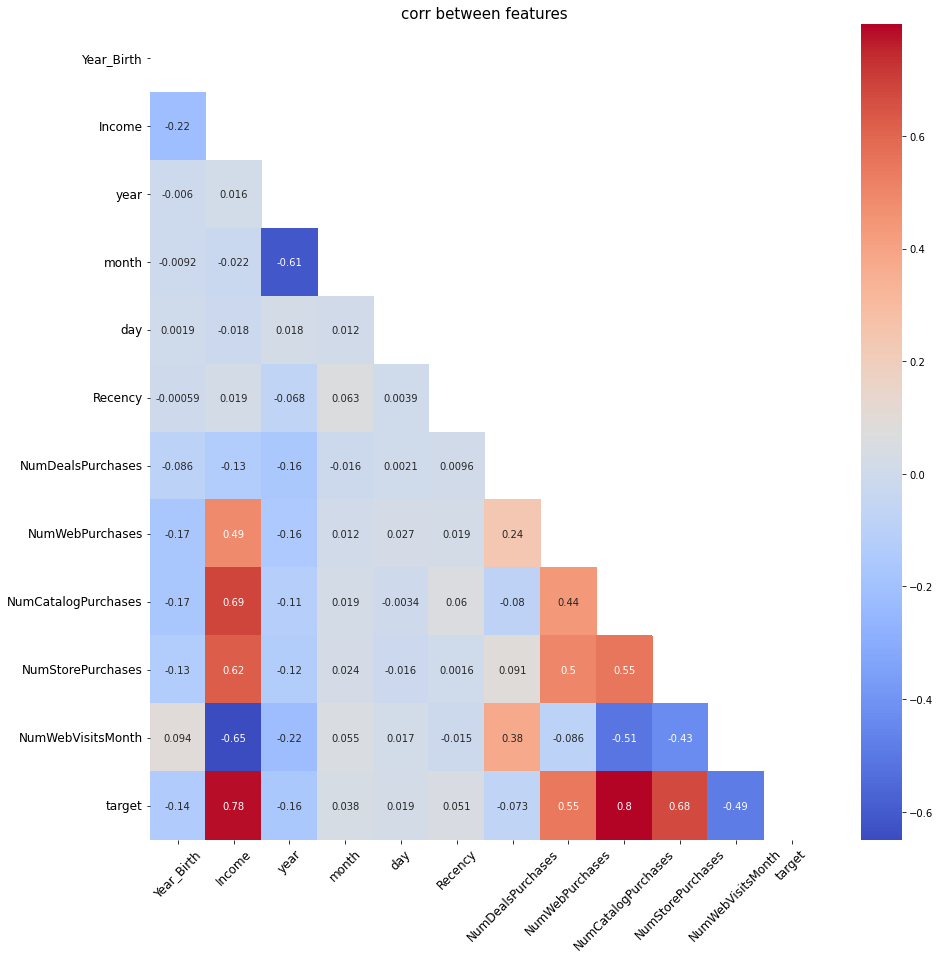

In [26]:
def corr_heat(df):
  plt.figure(figsize=(15, 15))

  corr_df = df.corr()
  display(corr_df)

  mask = np.zeros_like(corr_df)
  mask[np.triu_indices_from(mask)] = 1
  heat_map = sns.heatmap(corr_df, annot=True, mask=mask, cmap='coolwarm')
  heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
  heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
  plt.title('corr between features', fontsize=15)
  plt.show()

corr_heat(train[quantitative])